# Test eroding text at the edges

In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
from random import seed

import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
from tqdm import tqdm

from allometry.font_util import choose_augment, BOLD, REGULAR
from allometry.page_image import x_image, y_image

In [3]:
WIDTH = 4500
HEIGHT = 3440

DATA_DIR = Path('..') / 'data'

X_DIR = DATA_DIR / 'result' / 'X'
Y_DIR = DATA_DIR / 'result' / 'Y'

TEXT_DIR = DATA_DIR / 'page' / 'pool_valid'

FONTS_DIR = Path('..') / 'fonts'

COUNT = 10

In [4]:
seed(42768)

In [5]:
def get_images():
    xs = list(X_DIR.glob('*.jpg'))
    ys = list(Y_DIR.glob('*.jpg'))
    xs = xs[:COUNT]
    ys = ys[:COUNT]
    xs = [Image.open(x).convert('L') for x in xs]
    ys = [Image.open(y).convert('L') for y in ys]
    return [(x, y) for x, y in zip(xs, ys)]

In [6]:
def scan_sums(image, axis):
    image = ImageOps.invert(image)

    data = np.asarray(image).copy()
    data[data < 128] = 0

    sums = data.sum(axis=axis)

    lines = []

    for i, (a, b, c) in enumerate(zip(sums[:-2], sums[1:-1], sums[2:])):

        if a == 0 and a < b <= c:
            lines.extend([i+1, i+2])

        if c == 0 and a >= b > c:
            lines.extend([i, i+1])

    return lines

In [7]:
def erode_text(y):
    x = np.array(y)

    vert = scan_sums(y, 0)
    horiz = scan_sums(y, 1)

    for v in vert:
        x[:, v] = 255

#     for h in horiz:
#         x[h, :] = 255

    x = Image.fromarray(x)
    return x

In [8]:
def custom_filter(image):
    """This filter seems to degrade the image in realistic way."""
    image = image.filter(ImageFilter.Kernel(
        size=(3, 3),
        kernel=(1, 0, 1, 
                0, 0, 0, 
                1, 0, 1)
    ))
    return image

In [9]:
images = get_images()

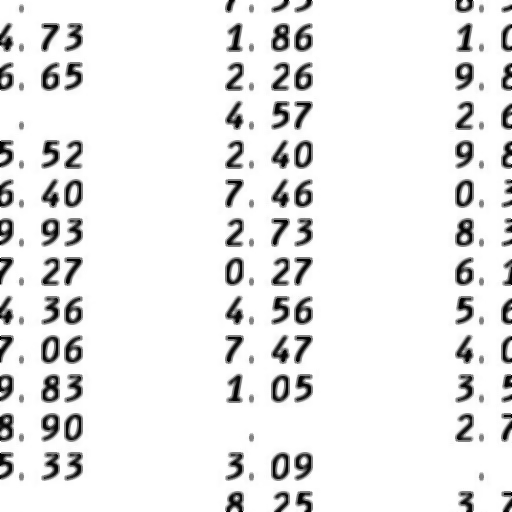

In [10]:
x, y = images[1]
x = erode_text(y)
x = custom_filter(x)
x = x.filter(ImageFilter.MedianFilter())

display(x)

In [11]:
# display(y)

In [12]:
# for i, (x, y) in enumerate(images):
#     print(i)
#     display(y)